# Homework 5 (100 points)

This homework will focus on Neural Networks and visualization.

a) Write a function that takes a keras network and outputs an image (png format) of the network. (10points)

You can assume the model is sequential and only uses dense layers. The input and output neurons must be blue circles. The hidden neurons must be green circles. The edges must be directed red arrows.

For example, the output image for

```python
    model = keras.models.Sequential()
    model.add(layers.Dense(2, input_dim=2))
    model.add(layers.Dense(1))
    model.compile(loss="binary_crossentropy")
```

should look exactly like this:

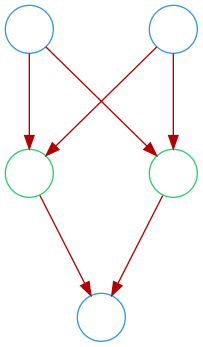

In [ ]:
from IPython.display import Image
Image(filename="example.png")

Hint: use the networkx library (specifically the [to_agraph](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.to_agraph.html) method)

In [1]:
#libraries used in this exercise
import numpy as np
import networkx as nx
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from networkx.drawing.nx_agraph import to_agraph

from IPython.display import Image as img_display

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

In [ ]:
def plot_keras_model(model, filename):
    #TODO
    return

model_a = models.Sequential()
model_a.add(layers.Dense(2, input_dim=2))
model_a.add(layers.Dense(1))
model_a.compile(loss="binary_crossentropy")

plot_keras_model(model_a, "model_a.png")
Image.open("model_a.png")

b) Generate 100 datapoints of the form y = 5x - 1 + e where e ~ N(0, 1) and plot the data in a scatter plot. Create a Neural Network with no hidden layers (just input to ouput each with just one neuron), using the `mean_squared_error` loss and no activation function. Create an image of this model using a) then train this model on the dataset produced such that it learns a good fit to the points. Plot that fitted line. (10points)

c) Create a 3D animation (.gif) of the (weight, bias, loss) point over the training period. (15 points)

d) Generate data of the form y = 5x^3 + 3x^2 + x - 1 + e where e ~ N(0, 1) and plot the data in a scatter plot. Create and train a neural network on this dataset and plot the resulting curve through the scatter plot. Explain your choice of model architecture (number of layers, and neurons) as well as your choice of activation function. (5points)

e) Create an animation of the resulting curve learned by your model throughout the training process. (15points)

f) Below is code to create a Generative Adversarial Network (GAN). The goal of the GAN is to generate data that is fake but looks real. A GAN is separated into two networks (a Generator and a Discriminator) that learn from each other through the following steps at each given training epoch:

1. The Generator generates data
2. The Discriminator is trained to learn how to distinguish real data from the fake data that the generator just generated.
3. The Generator is then trained to improve its ability to generate fake data by being informed by the Discriminators new ability to distinguish real from fake.

Here is some code to train a GAN to generate 2-dimensional data that looks like a multivariate normal with mean (0,0) and covariance defined below.

The code has one major flaw though that will prevent it from ever generating data that looks like the real data. Something is wrong with the architecture of the model (layers, activation etc). Find and fix that flaw and explain your reasoning below. (15points)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.activation import ReLU
from PIL import Image as im

TEMPFILE = 'temp.png'

# Define the parameters
np.random.seed(0)
gen_input_dim = 100
epochs = 100
batch_size = 128
images = []

# Define the generator model
generator = Sequential()
generator.add(Dense(32, input_dim=gen_input_dim, activation='tanh'))
generator.add(Dense(2), activation='sigmoid')

# Define the discriminator model
discriminator = Sequential()
discriminator.add(Dense(16, input_dim=2))
discriminator.add(ReLU())
discriminator.add(Dense(1, activation='sigmoid'))

# Compile the models
generator.compile(loss='mse')
discriminator.compile(loss='binary_crossentropy')

# Define the GAN model
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy')

# Define the real data
x_real = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 1000)

# Train the GAN
# don't change the code below
for epoch in range(epochs):
    # Generate fake data
    z = np.random.normal(size=(batch_size, gen_input_dim))
    x_fake = generator.predict(z)

    # Train the discriminator
    discriminator.trainable = True
    discriminator.train_on_batch(x_real, np.ones((len(x_real), 1)))
    discriminator.train_on_batch(x_fake, np.zeros((batch_size, 1)))

    # Train the generator
    discriminator.trainable = False
    gan.train_on_batch(z, np.ones((batch_size, 1)))

g) Create an animation of the generated data over the course of the training process (with the real data plotted in a different color for reference). (15points)

h) Tune the above model in order to generate data as close as possible to the real data. (15points)